In [13]:
import pandas as pd
import zipfile
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report



In [14]:
from google.colab import drive 
drive.mount("/content/drive")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
 
z= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/YouTube-Spam-Collection-v1.zip")
Psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
Katy =pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAQ =pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem =pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira =pd.read_csv(z.open("Youtube05-Shakira.csv"))
data = pd.concat([Psy,Katy,LMFAQ,Eminem,Shakira])
data.head()






,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [16]:
data = pd.concat([Psy,Katy,LMFAQ,Eminem,Shakira])
data.drop(["COMMENT_ID","DATE","AUTHOR"],axis=1,inplace=True)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(data["CONTENT"],data["CLASS"],test_size=0.4,random_state=209)
model=svm.SVC(kernel="linear")
print(X_train,X_test,y_train,y_test)


163                      Laughing My Fucking Ass Off!!!﻿
120                                                  wow
36                                 Stop,is a very TOP 1﻿
374                                               super﻿
222    I just wanna see how many people like this com...
                             ...                        
71     plz check out fablife / welcome to fablife for...
323    Check out this video on YouTube:Facebook lhudy...
146    She's got it all. Incredible voice, extremely ...
125                                  Great music anyway﻿
34     Its funny that Mahogany is there lmao, I actua...
Name: CONTENT, Length: 1173, dtype: object 128    SERIOUSLY HOW DID THEY COME UP WITH THAT BEAT ...
114    How can this song have 629 million views while...
348    Honestly speaking except taylor swift and adel...
246                                                  Wow
134                                ❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿
                             ...             

In [18]:
tfidf_vect = TfidfVectorizer(use_idf=True,lowercase=True)
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(1173, 3107)

In [19]:
model=svm.SVC(kernel="linear")
model.fit(X_train_tfidf,y_train)



SVC(kernel='linear')

In [20]:
X_test_tfidf= tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)
predictions


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [21]:
confusion_matrix(y_test,predictions)


array([[356,  14],
       [ 30, 383]])

In [22]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)

print(cf_matrix)

[[356  14]
 [ 30 383]]


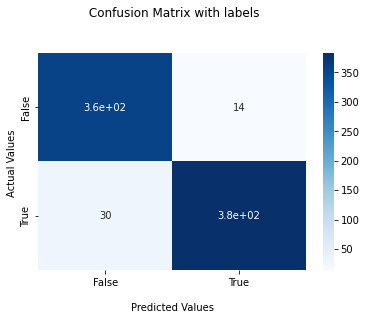

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       370
           1       0.96      0.93      0.95       413

    accuracy                           0.94       783
   macro avg       0.94      0.94      0.94       783
weighted avg       0.94      0.94      0.94       783

